### Step 1: Business Understanding

Perusahaan multifinance perlu meningkatkan keakuratan penilaian risiko kredit untuk mengoptimalkan keputusan bisnis dan mengurangi kerugian. Kami mengembangkan model machine learning menggunakan data pinjaman dari Lending Club (2007-2014) untuk memprediksi risiko kredit, dengan fokus pada metrik bisnis seperti kerugian dan margin keuntungan bersih. Analisis data ini bertujuan untuk mengidentifikasi pola yang mengindikasikan pinjaman berpotensi buruk atau berisiko, tanpa asumsi yang kuat, untuk mendukung pengambilan keputusan investasi.

Berdasarkan penjelasan di atas, kita dapat fokuskan menjadi 3 bagian yaitu:

<div class="alert alert-block alert-danger">
<b>Problem Statement:</b> Perusahaan multifinance mengalami kerugian karena pengambilan keputusan yang tidak optimal atau tidak didasari dengan pendekatan data-drive decision-making (DDDM).</div>

<div class="alert alert-block alert-info">
<b>Objectives:</b> Mengidentifikasi pola yang mengindikasikan pinjaman berpotensi buruk atau berisiko dan mengembangkan model machine learning dengan memprediksi risiko kredit.
</div>

<div class="alert alert-block alert-warning">
<b>Business Metrics:</b> Kerugian (Net Loss) dan Margin Keuntungan Bersih (Net Profit Margin).
</div>

<div class="alert alert-block alert-success">
<b>Goals:</b> Memberikan rekomendasi bisnis berdasarkan data-driven decision-making (DDDM), sehingga dapat mengoptimalkan pengambilan keputusan bisnis dan mengurangi kerugian serta meningkatkan net profit margin (NPM)
</div>

### Step 2: Gather the Data

Data yang akan dipakai adalah `data loan_data_2007_2014.csv`. Data belum diproses sebelumnya, sehingga harus dilakukan proses preprocessing terlebih dahulu.

### Step 3: Prepare Data for Consumption

#### 3.1 Import Libraries

In [1]:
# access to system parameters https://docs.python.org/3/library/sys.html
import sys 
print("Python version: {}". format(sys.version))

import numpy as np # foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

# collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import pandas as pd 
print("pandas version: {}". format(pd.__version__))

# collection of functions for scientific computing and advance mathematics
import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

# pretty printing of dataframes in Jupyter notebook
import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

# collection of machine learning algorithms
import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

# data visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
print("matplotlib version: {}". format(plt.matplotlib.__version__))

# made prettier plots
import seaborn as sns 
print("seaborn version: {}". format(sns.__version__))

# statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# misc libraries
import os
import pickle
from time import time

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# show plots in jupyter notebook browser
%matplotlib inline 

# set plot style
sns.set(style="white", color_codes=True)

Python version: 3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]
NumPy version: 2.0.0
pandas version: 2.2.2
SciPy version: 1.13.0
IPython version: 8.12.3
scikit-learn version: 1.4.2
matplotlib version: 3.8.4
seaborn version: 0.13.2
-------------------------


In [2]:
# sklearn libraries for data transform
# reference: https://scikit-learn.org/stable/data_transforms.html

from sklearn.impute import SimpleImputer                    # imputation missing values
from sklearn.pipeline import Pipeline, make_pipeline        # pipeline
from sklearn.pipeline import FeatureUnion                   # feature union
from sklearn.compose import ColumnTransformer               # column transformer
from sklearn.compose import make_column_transformer         # make column transformer ()
from sklearn.base import BaseEstimator, TransformerMixin    # base estimator

# sklearn libraries for preprocessing
# reference: https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler            # standard scaler
from sklearn.preprocessing import PowerTransformer          # power transformer
from sklearn.preprocessing import MinMaxScaler              # min max scaler
from sklearn.preprocessing import LabelEncoder              # label encoder
from sklearn.preprocessing import OneHotEncoder             # one hot encoder
from sklearn.preprocessing import OrdinalEncoder            # ordinal encoder

# sklearn libraries for feature selection
# reference: https://scikit-learn.org/stable/modules/feature_selection.html
from sklearn.feature_selection import f_classif                 # anova f score
from sklearn.feature_selection import chi2                      # chi square
from sklearn.feature_selection import SelectPercentile          # select percentile
from sklearn.feature_selection import SelectFdr                 # select fdr
from sklearn.feature_selection import SelectFpr                 # select fpr
from sklearn.feature_selection import SelectKBest               # select k best
from sklearn.feature_selection import mutual_info_classif       # mutual information
from sklearn.feature_selection import SelectFromModel           # select from model (pipeline)
from sklearn.feature_selection import RFE                       # recursive feature elimination and cross validation
from sklearn.feature_selection import SequentialFeatureSelector # sequential feature selection
from sklearn.decomposition import PCA                           # pca

# sklearn libraries for model selection
# reference: https://scikit-learn.org/stable/model_selection.html
from sklearn.model_selection import train_test_split        # split data into training and testing sets reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import cross_validate          # cross validate reference: https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score         # cross validation reference: https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import GridSearchCV            # grid search reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import RandomizedSearchCV      # random search reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import StratifiedKFold         # stratified k fold reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

# sklearn libraries for model algorithms -- classification
# reference: https://scikit-learn.org/stable/supervised_learning.html
from sklearn.linear_model import LogisticRegression             # logistic regression reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.neighbors import KNeighborsClassifier              # k nearest neighbors classifier reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.naive_bayes import GaussianNB                      # naive bayes reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.tree import DecisionTreeClassifier                 # decision tree reference: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.ensemble import VotingClassifier                   # voting classifier reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import StackingClassifier                # stacking classifier reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
from sklearn.ensemble import RandomForestClassifier             # random forest reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import BaggingClassifier                  # bagging reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
from sklearn.ensemble import AdaBoostClassifier                 # adaboost reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.neural_network import MLPClassifier                # neural network reference: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# sklearn libraries for model evaluation -- classification 
# reference: https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import make_scorer                     # make scorer
from sklearn.metrics import confusion_matrix                # confusion matrix
from sklearn.metrics import classification_report           # classification report
from sklearn.metrics import accuracy_score                  # accuracy score
from sklearn.metrics import roc_curve, auc                  # ROC curve
from sklearn.metrics import f1_score                        # F1 score
from sklearn.metrics import roc_auc_score                   # roc_auc score
from sklearn.metrics import recall_score                    # recall score
from sklearn.metrics import log_loss                        # log loss

# xgboost model
# reference: https://xgboost.readthedocs.io/en/latest/python/python_intro.html
import xgboost as xgb                                       # xgboost algorithm model
from xgboost import XGBClassifier                           # xgboost algorithm model

# lightgbm model
# reference: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [3]:
# setting max columns in pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 3.2 Import Data

In [4]:
# import dataset
raw = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

In [5]:
# restore point
df = raw.copy()

In [6]:
# glimpse dataset
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.3 Data Understanding

In [7]:
# inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
# inspect number of unique values
df.nunique().sort_values(ascending=False)

Unnamed: 0                     466285
id                             466285
member_id                      466285
url                            466285
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_int                  270249
tot_cur_bal                    220690
emp_title                      205475
last_pymnt_amnt                198194
total_rec_prncp                172713
out_prncp_inv                  141189
out_prncp                      135665
desc                           124435
title                           63098
revol_bal                       58142
installment                     55622
annual_inc                      31901
recoveries                      22773
collection_recovery_fee         20275
total_rev_hi_lim                14612
funded_amnt_inv                  9854
tot_coll_amt                     6321
total_rec_late_fee               5808
dti                              3997
funded_amnt                      1354
loan_amnt   

In [9]:
# shape of dataset
df.shape

(466285, 75)

In [10]:
# inspect loan_status by percent
df['loan_status'].value_counts(normalize=True) * 100

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64

In [11]:
# function to mapping loan_status
def mapping_loan_status(x):
    if x in ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']:
        return 'Good'
    elif x in ['Charged Off', 'Late (31-120 days)', 'Default', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']:
        return 'Bad'
    else:
        return x

In [12]:
# mapping loan_status
df['loan_status'] = df['loan_status'].apply(lambda x: mapping_loan_status(x))

In [13]:
# inspect loan_status by percent
df['loan_status'].value_counts(normalize=True) * 100

loan_status
Good    88.808132
Bad     11.191868
Name: proportion, dtype: float64

In [14]:
# inspect loan_status by value
df['loan_status'].value_counts()

loan_status
Good    414099
Bad      52186
Name: count, dtype: int64

In [15]:
# drop unnecessary columns
cols_to_drop = ['Unnamed: 0', 'id', 'member_id', 'desc', 'title', 'url', 'zip_code','policy_code', 'application_type',
                'pymnt_plan', 'sub_grade', 'emp_title', 'addr_state', 'earliest_cr_line', 'initial_list_status',
                'issue_d', 'last_pymnt_d','next_pymnt_d','last_credit_pull_d']
df.drop(cols_to_drop, axis=1, inplace=True)

# inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  loan_status                  466285 non-null  object 
 12  purpose                      466285 non-null  object 
 13 

In [16]:
# function to inspect missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    return pd.concat([mis_val, mis_val_percent], axis=1, keys=['Total', 'Percent'])

In [17]:
# condition for missing values more than 40% and under 10%
condition_1 = missing_values_table(df)['Percent'] > 40
condition_2 = (missing_values_table(df)['Percent'] > 0) & (missing_values_table(df)['Percent'] < 10)

In [18]:
# inspect missing values more than 40% (condition_1) -- drop feature
missing_values_table(df)[condition_1].sort_values('Percent', ascending=False)

,Total,Percent
annual_inc_joint,466285,100.000000
open_acc_6m,466285,100.000000
verification_status_joint,466285,100.000000
dti_joint,466285,100.000000
il_util,466285,100.000000
open_rv_12m,466285,100.000000
open_rv_24m,466285,100.000000
open_il_6m,466285,100.000000
open_il_12m,466285,100.000000
open_il_24m,466285,100.000000


In [19]:
# inspect missing values under 10% (condition_2) -- drop records
missing_values_table(df)[condition_2].sort_values('Percent', ascending=False)

,Total,Percent
emp_length,21008,4.505399
revol_util,340,0.072917
collections_12_mths_ex_med,145,0.031097
pub_rec,29,0.006219
delinq_2yrs,29,0.006219
inq_last_6mths,29,0.006219
total_acc,29,0.006219
open_acc,29,0.006219
acc_now_delinq,29,0.006219
annual_inc,4,0.000858


In [20]:
# make empty list to store cols to drop based on missing values
cols_to_drop = []

cols_to_drop.extend(missing_values_table(df)[condition_1].index.to_list())

print(f'Total feature drop based on missing values: {len(cols_to_drop)}')
print(f'Feature drop based on missing values: {cols_to_drop}')
print(f'Shape of dataset: {df.shape}')

Total feature drop based on missing values: 20
Feature drop based on missing values: ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
Shape of dataset: (466285, 56)


In [21]:
# drop feature based on missing values
df.drop(cols_to_drop, axis=1, inplace=True)
print(f'All feature successfully dropped')
print(f'Shape of dataset: {df.shape}')

All feature successfully dropped
Shape of dataset: (466285, 36)


In [22]:
# drop records based on missing values
cols_to_drop = []

cols_to_drop.extend(missing_values_table(df)[condition_2].index.to_list())
df.dropna(subset=cols_to_drop, inplace=True)

print(f'All missing values successfully dropped')
print(f'Shape of dataset: {df.shape}')

All missing values successfully dropped
Shape of dataset: (444836, 36)


In [23]:
# inspect duplicates
if df.duplicated().sum().any() == 0:
    print('There is no duplicated data')
else:
    print('There is duplicated data')

There is no duplicated data


In [24]:
# function to separate categorical and numerical features
def numerical_and_categorical(df):
    numerical = []
    categorical = []
    for i in df.columns:
        if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    print(f'Total numerical feature {len(numerical)}')
    print(f'Total categorical feature {len(categorical)}')
    return numerical, categorical

In [25]:
# call function to separate categorical and numerical features
numerical, categorical = numerical_and_categorical(df)

Total numerical feature 29
Total categorical feature 7


In [26]:
# list numerical features
numerical

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [27]:
# list categorical features
categorical

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose']

In [28]:
# inspect missing values on categorical features
missing_values_table(df[categorical])[missing_values_table(df[categorical])['Total'] > 0].sort_values('Total', ascending=False)

,Total,Percent


In [29]:
# inspect missing values on numerical features
missing_values_table(df[numerical])[missing_values_table(df[numerical])['Total'] > 0].sort_values('Total', ascending=False)

,Total,Percent
tot_coll_amt,67986,15.283385
tot_cur_bal,67986,15.283385
total_rev_hi_lim,67986,15.283385


In [30]:
missing_values_table(df[numerical])[missing_values_table(df[numerical])['Total'] > 0].sort_values('Total', ascending=False).index.to_list()

['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

Step 3 Summary

--- Dataset Overview ---

- Raw dataset has 466285 rows and 75 columns.
- Target based on feature "loan_status".
- Create new feature "target" based on "loan_status" using mapping with values "Good" and "Bad".
- Proportion of target "Good" and "Bad" are 88.80% and 11.19%.
- Drop unnecessary features by several conditions. (high cardinality features, 1 unique values or no values, time series features)

--- Missing values and Duplicates ---

- There is missing values in dataset, some feature have more than 40% missing values so we will drop those feature and some feature have less than 10% missing values so we will drop those records.
- There is 3 feature in numerical features, "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", and no categorical features have missing values.
- Imputation missing values will be processed after data splitting to prevent data leakage.
- There is no duplicated data.


### Step 4: Exploratory Data Analysis

#### 4.1 Descriptive Statistics

In [31]:
# desc stats
stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
loan_amnt,444836.0,14452.666095,8296.872248,500.00,8000.0000,12375.000,20000.000,3.500000e+04
funded_amnt,444836.0,14426.529271,8284.817952,500.00,8000.0000,12350.000,20000.000,3.500000e+04
funded_amnt_inv,444836.0,14355.986697,8308.642040,0.00,8000.0000,12175.000,20000.000,3.500000e+04
int_rate,444836.0,13.822432,4.360415,5.42,10.9900,13.660,16.490,2.606000e+01
installment,444836.0,435.597898,243.789616,15.67,260.3100,383.250,571.080,1.409990e+03
annual_inc,444836.0,74393.974915,55564.855872,1896.00,45547.5000,64500.000,90000.000,7.500000e+06
dti,444836.0,17.165982,7.820335,0.00,11.3400,16.820,22.700,3.999000e+01
delinq_2yrs,444836.0,0.286362,0.799429,0.00,0.0000,0.000,0.000,2.900000e+01
inq_last_6mths,444836.0,0.806484,1.092289,0.00,0.0000,0.000,1.000,3.300000e+01
open_acc,444836.0,11.247446,4.997201,1.00,8.0000,10.000,14.000,8.400000e+01


In [32]:
# create new column to inspect skewness where mean < median or median > mean
# stats['50%'] < stats['mean'] -- median < mean -- positively skew
# stats['50%'] > stats['mean'] -- median > mean -- negatively skew
# stats['50%'] == stats['mean'] -- no skew

stats['skew'] = np.where(
    round(stats['50%']) < round(stats['mean']), 
    'positively skewed', 
    np.where(round(stats['50%']) > round(stats['mean']), 'negatively skewed', 'no skew')
    )

stats[['mean','50%','skew']].sort_values(by='skew')

,mean,50%,skew
revol_util,56.287086,57.700,negatively skewed
acc_now_delinq,0.004013,0.000,no skew
int_rate,13.822432,13.660,no skew
collections_12_mths_ex_med,0.009003,0.000,no skew
dti,17.165982,16.820,no skew
delinq_2yrs,0.286362,0.000,no skew
pub_rec,0.154518,0.000,no skew
loan_amnt,14452.666095,12375.000,positively skewed
tot_coll_amt,189.012801,0.000,positively skewed
last_pymnt_amnt,3178.828922,553.800,positively skewed


#### 4.2 Univariate Analysis

##### 4.2.1 Numerical Features

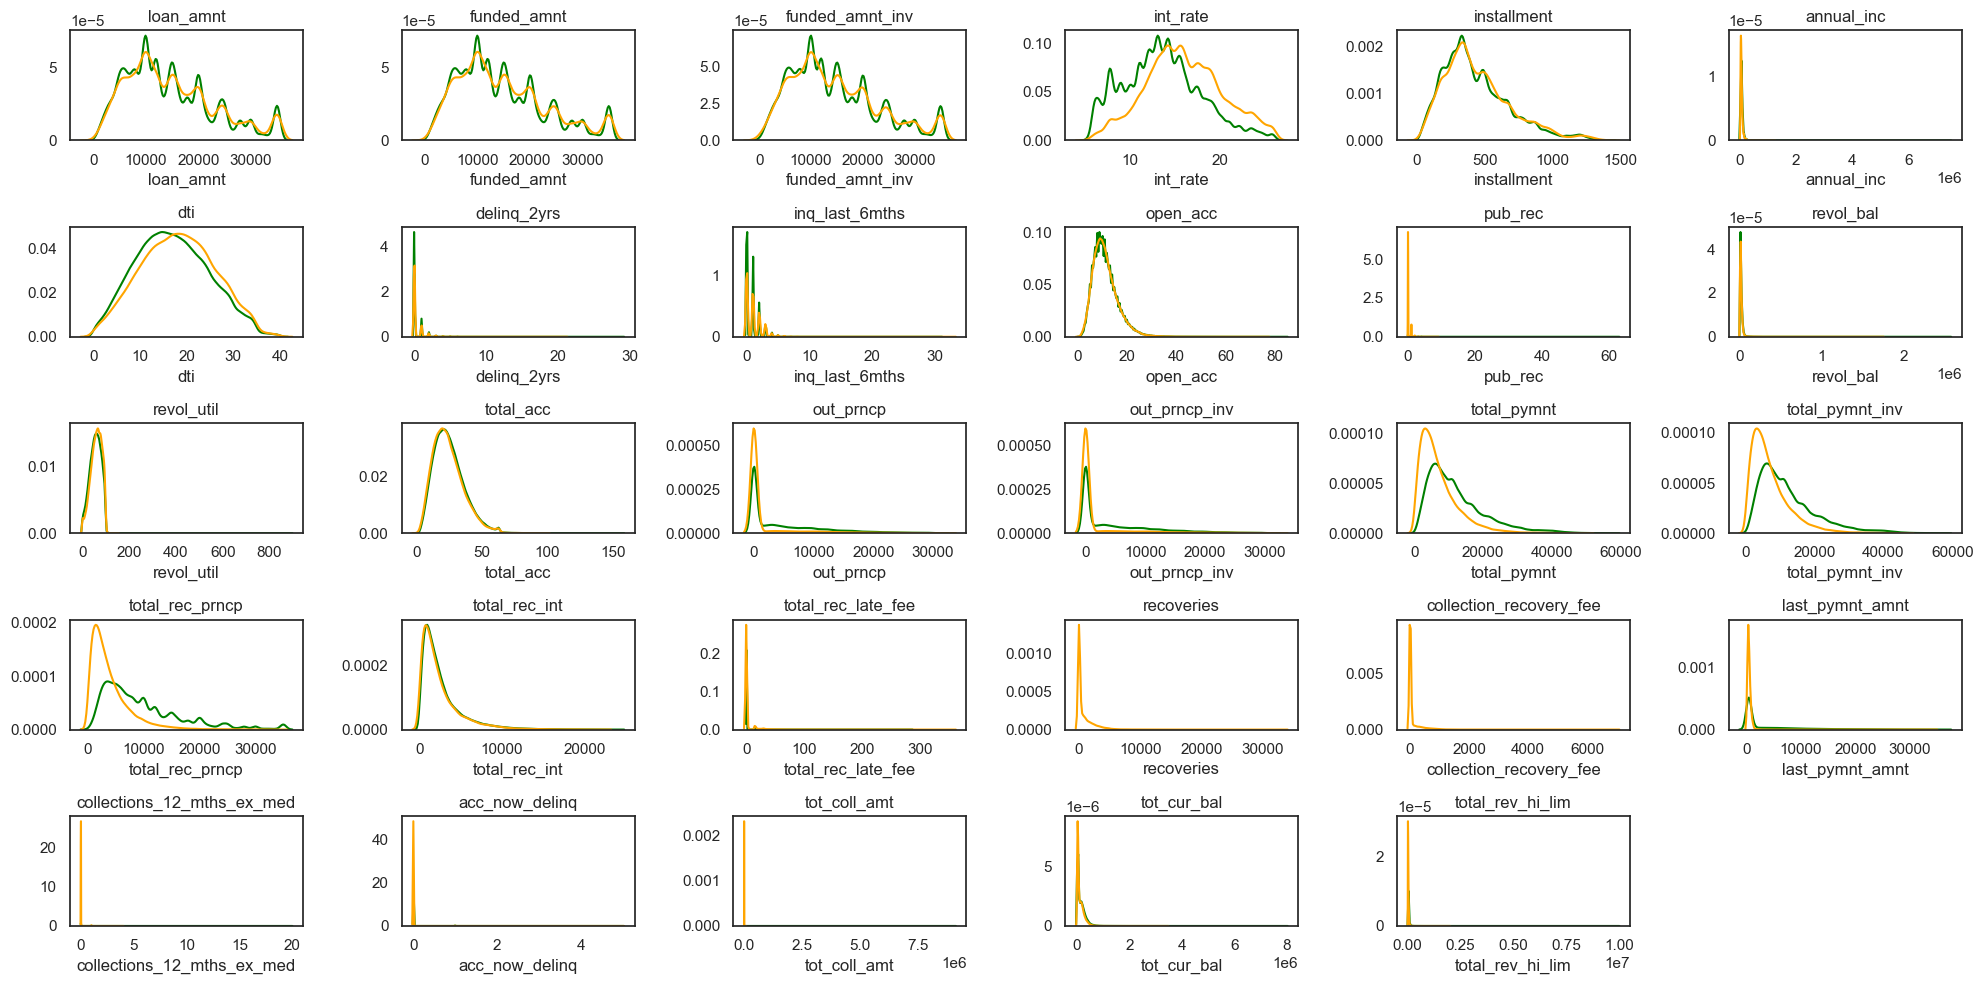

In [33]:
# kde plot to inspect distribution
plt.figure(figsize=(20, 10))
for i in range(0, len(numerical)):
    plt.subplot(5, 6, i + 1)
    sns.kdeplot(df[df['loan_status'] == 'Good'][numerical[i]], color='green', warn_singular=False)
    sns.kdeplot(df[df['loan_status'] == 'Bad'][numerical[i]], color='orange', warn_singular=False)
    plt.title(numerical[i])
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

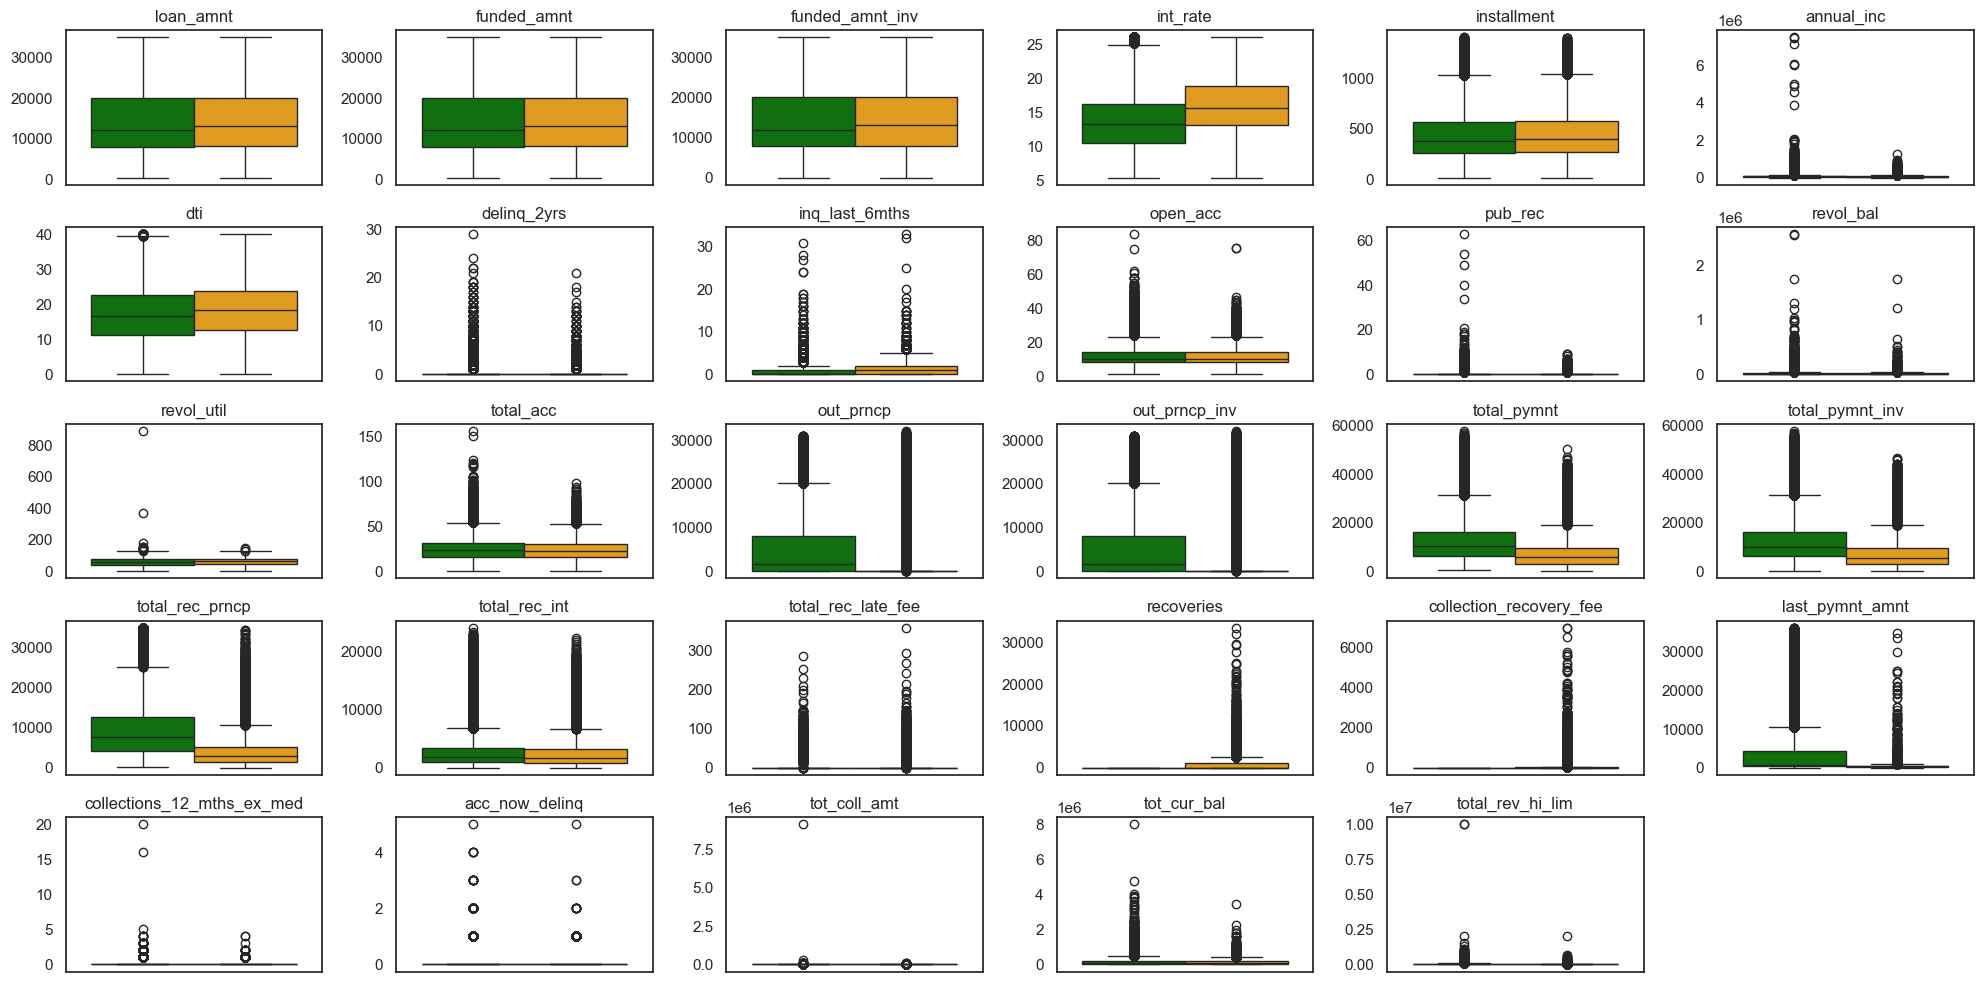

In [34]:
# box plot to inspect outliers
plt.figure(figsize=(20, 10))
for i in range(0, len(numerical)):
    plt.subplot(5, 6, i+1)
    sns.boxplot(y=df[numerical[i]], hue=df['loan_status'], palette=['green', 'orange'], hue_order=['Good', 'Bad'], legend=False)
    plt.title(numerical[i])
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

##### 4.2.2 Categorical Features

In [35]:
# count unique values
categorical.remove('loan_status') # remove target
for col in categorical:
    print(f'{col}:', df[col].nunique(), 'unique values')

term: 2 unique values
grade: 7 unique values
emp_length: 11 unique values
home_ownership: 6 unique values
verification_status: 3 unique values
purpose: 14 unique values


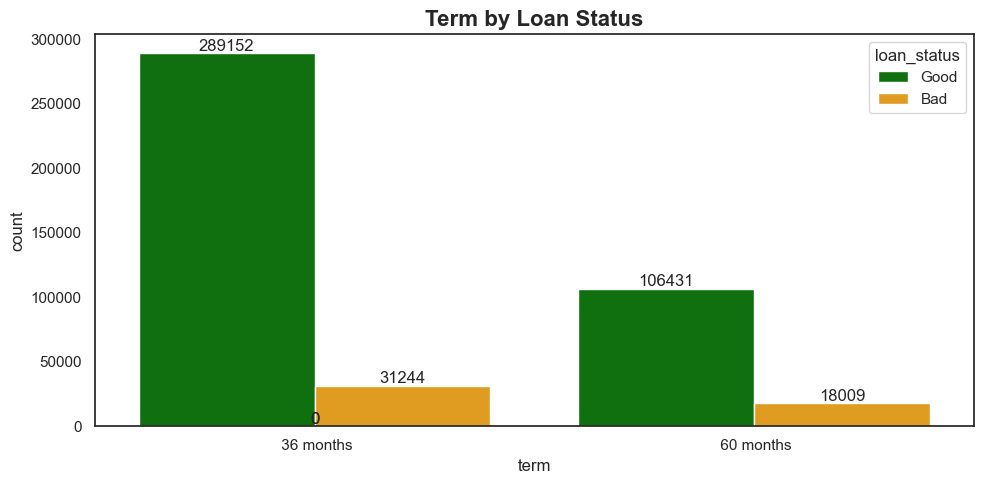

In [36]:
# count plot on term
order = df['term'].unique().tolist()
order = sorted(order)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='term', data=df, hue='loan_status', hue_order=['Good', 'Bad'], order=order, palette=['green', 'orange'])
ax.set_title('Term by Loan Status', fontsize=16, weight='bold')
for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

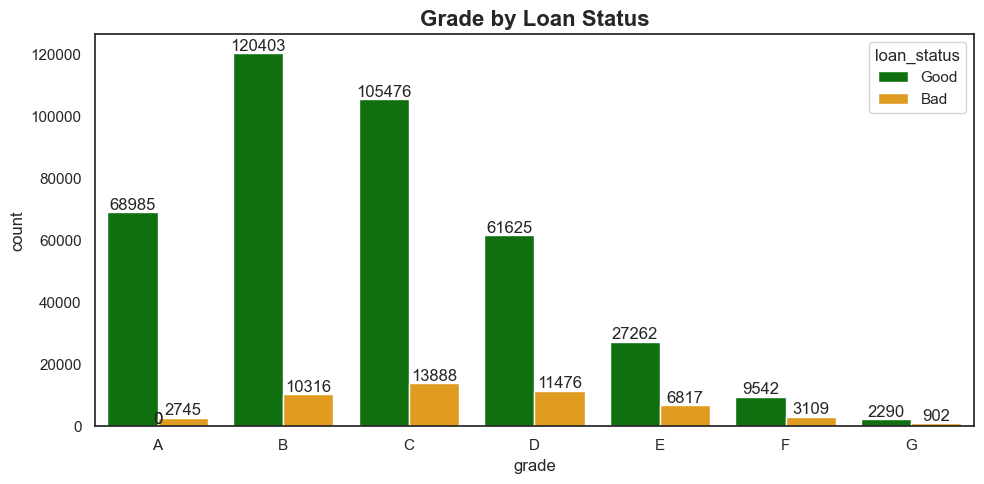

In [37]:
# count plot on grade
order = df['grade'].unique().tolist()
order = sorted(order)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='grade', data=df, hue='loan_status', hue_order=['Good', 'Bad'], order=order, palette=['green', 'orange'])
ax.set_title('Grade by Loan Status', fontsize=16, weight='bold')
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

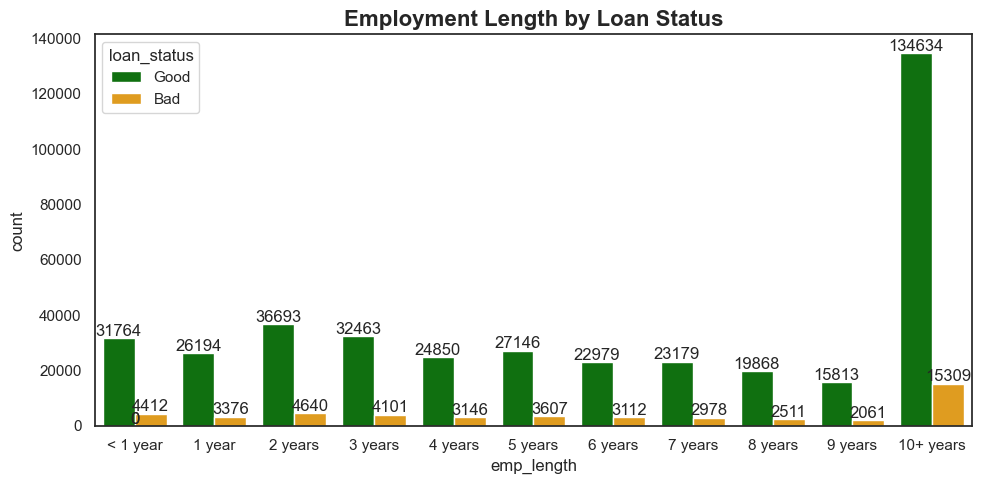

In [38]:
# count plot on employment length
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='emp_length', data=df, hue='loan_status', hue_order=['Good', 'Bad'], order=order, palette=['green', 'orange'])
ax.set_title('Employment Length by Loan Status', fontsize=16, weight='bold')
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

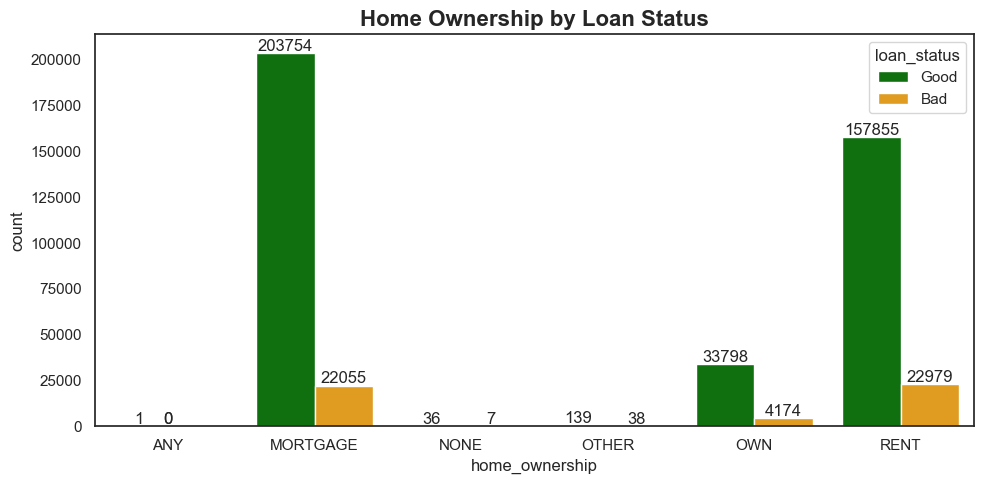

In [39]:
# count plot on home ownership
order = df['home_ownership'].unique().tolist()
order = sorted(order)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='home_ownership', data=df, hue='loan_status', hue_order=['Good', 'Bad'], order=order, palette=['green', 'orange'])
ax.set_title('Home Ownership by Loan Status', fontsize=16, weight='bold')
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

In [40]:
# replace 'NONE' and 'ANY' with 'OTHER'
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

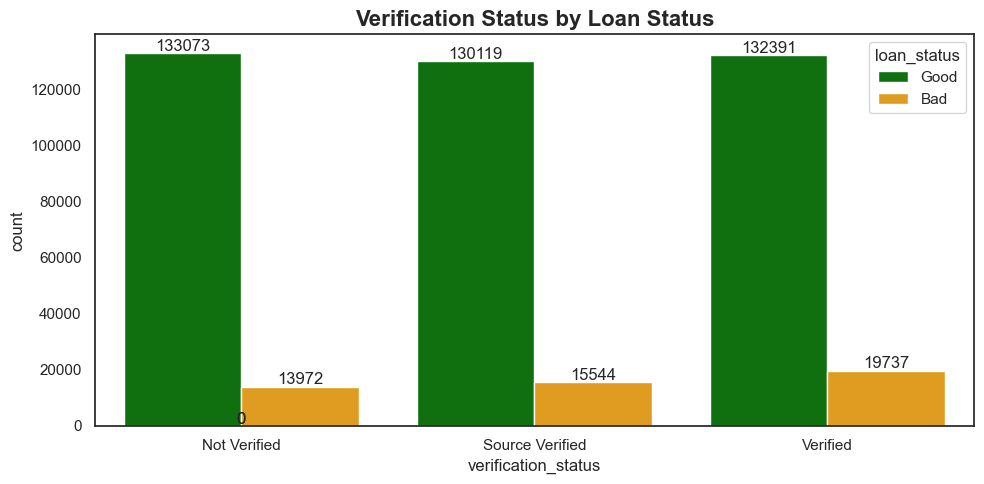

In [41]:
# count plot on verification status
order = df['verification_status'].unique().tolist()
order = sorted(order)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='verification_status', data=df, hue='loan_status', hue_order=['Good', 'Bad'], order=order, palette=['green', 'orange'])
ax.set_title('Verification Status by Loan Status', fontsize=16, weight='bold')
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

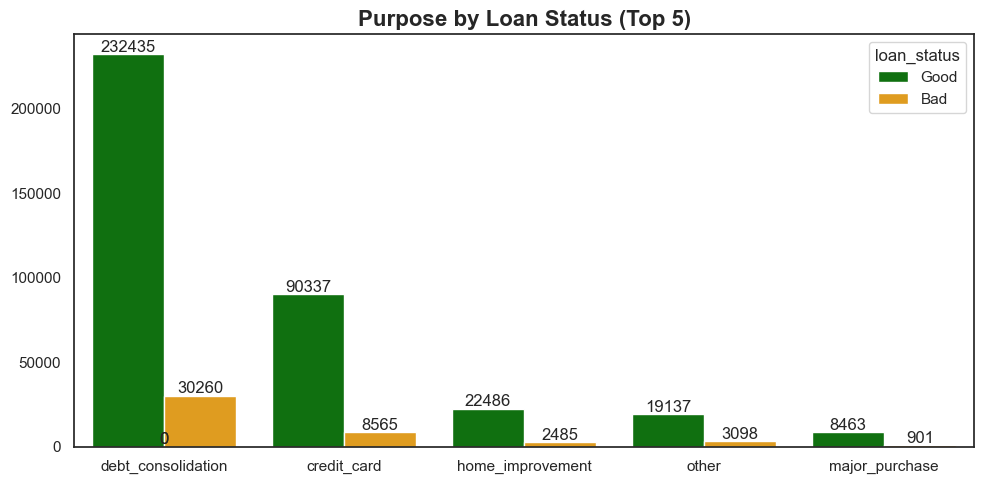

In [42]:
# count plot on purpose
purpose_counts = df.groupby('purpose')['loan_status'].value_counts(normalize=False).unstack().fillna(0)
order = purpose_counts.sort_values(by='Good', ascending=False).index.to_list()
n_largest = purpose_counts.sort_values(by='Good', ascending=False)[:5].index.to_list()

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='purpose', data=df[df['purpose'].isin(n_largest)], hue='loan_status', hue_order=['Good', 'Bad'], order=n_largest, palette=['green', 'orange'])
ax.set_title('Purpose by Loan Status (Top 5)', fontsize=16, weight='bold')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [43]:
# function to calculate proportions based on loan status
def proportions(df, col):
    df_proportion = df.groupby(col)['loan_status'].value_counts(normalize=True).unstack()
    df_proportion = round(df_proportion[['Good','Bad']] * 100,2)
    df_proportion = df_proportion.sort_values(by='Good', ascending=True)
    return df_proportion

In [44]:
# call function to calculate proportions
df_proportions_dict = {}
for col in ['purpose', 'grade', 'home_ownership', 'verification_status', 'emp_length', 'term']:
    df_proportion = proportions(df, col)
    df_proportions_dict[col] = df_proportion

In [45]:
# function to create stacked bar plots
def plot_stacked_bar(df_proportions_dict, columns, colors=['green', 'orange']):
    """
    Creates stacked bar plots for the given columns from the DataFrames in df_proportions_dict.

    Parameters:
    df_proportions_dict (dict): Dictionary of DataFrames with proportions, keyed by column names.
    columns (list): List of column names to plot.
    colors (list): List of colors for the bar stacks.
    """
    num_plots = len(columns)
    fig, axes = plt.subplots(1, num_plots, figsize=(18, 8))
    
    if num_plots == 1:
        axes = [axes]
    
    for i, col in enumerate(columns):
        ax = axes[i]
        df_proportions_dict[col].plot(kind='barh', stacked=True, ax=ax, color=colors)
        for c in ax.containers:
            labels = [f'{v.get_width():.2f}%' if v.get_width() > 0 else '' for v in c]
            ax.bar_label(c, labels=labels, label_type='center', color='black', fontsize=10)
        ax.set_xlabel('percentage')
        ax.set_ylabel('')
        ax.set_title(f'{col.replace("_", " ").title()} by Loan Status (%)', fontsize=16, weight='bold')
        ax.legend(title='Loan Status', bbox_to_anchor=(1, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

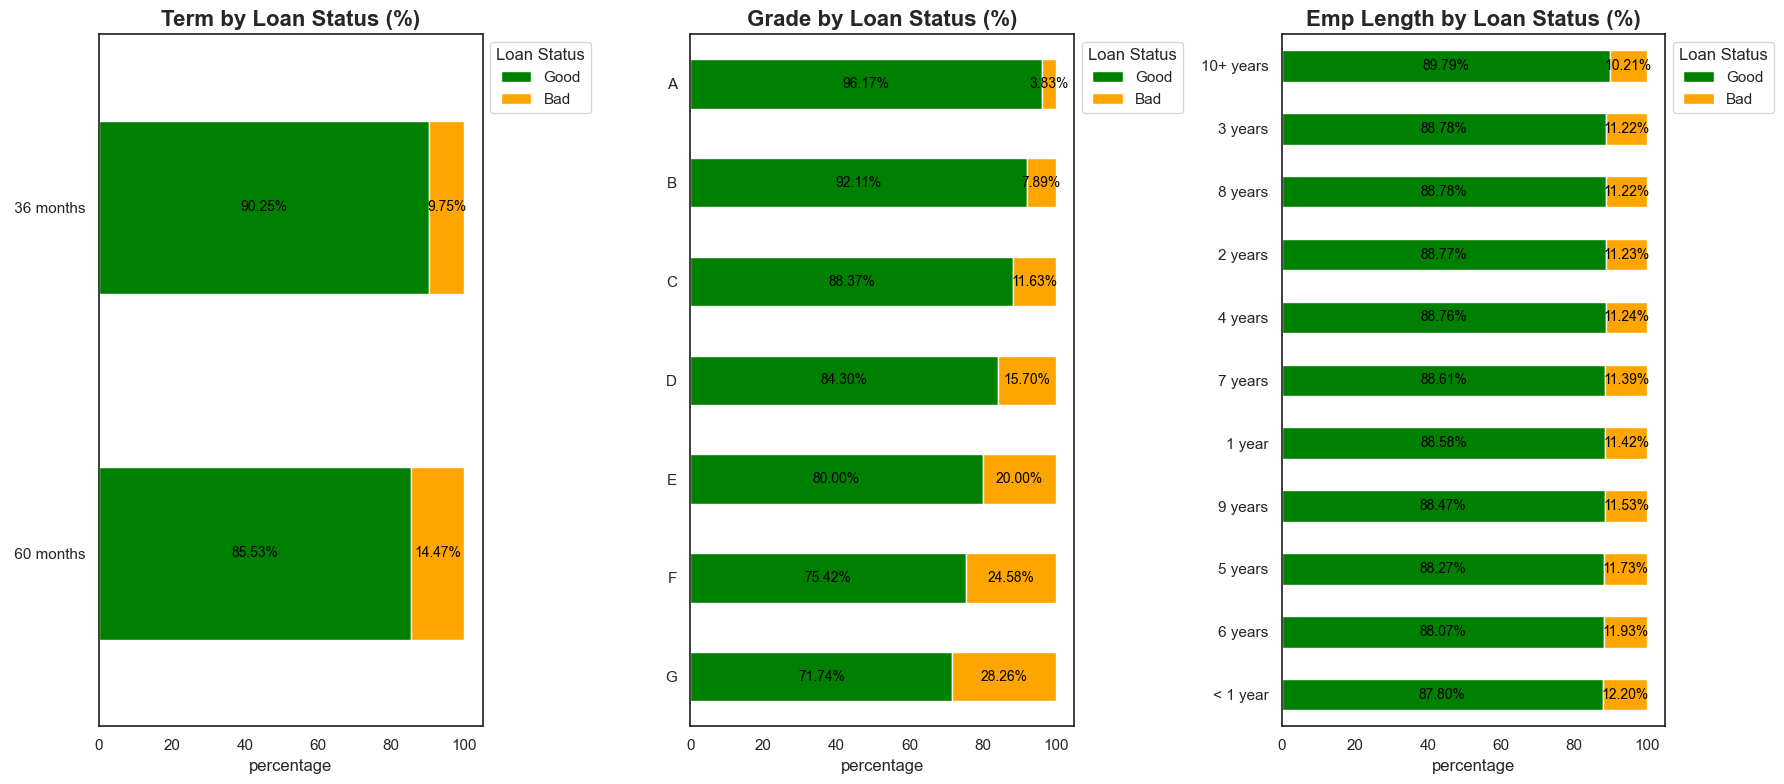

In [46]:
columns_to_plot = ['term', 'grade', 'emp_length']
plot_stacked_bar(df_proportions_dict, columns_to_plot)

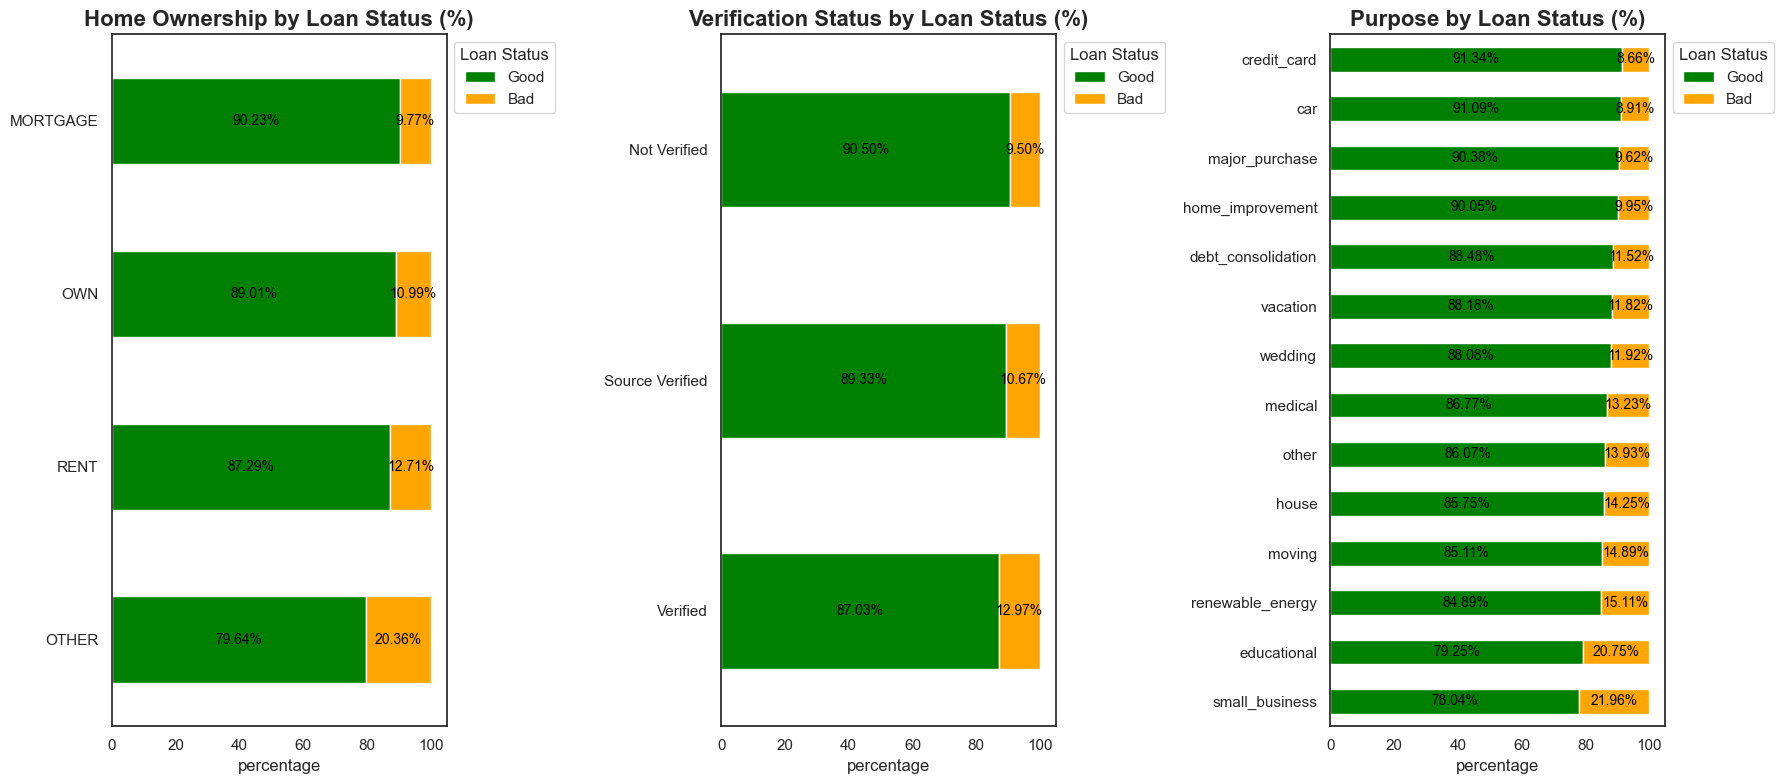

In [47]:
columns_to_plot = ['home_ownership', 'verification_status', 'purpose']
plot_stacked_bar(df_proportions_dict, columns_to_plot)

#### 4.3 Multivariate Analysis

In [48]:
# encode target variable Good as 1 and Bad as 0
df['target'] = df['loan_status'].map({'Bad':0, 'Good':1})
df[['loan_status','target']].sample(5)

,loan_status,target
368519,Good,1
352479,Good,1
140983,Good,1
15167,Good,1
219808,Good,1


##### 4.3.1 Matrix Correlation

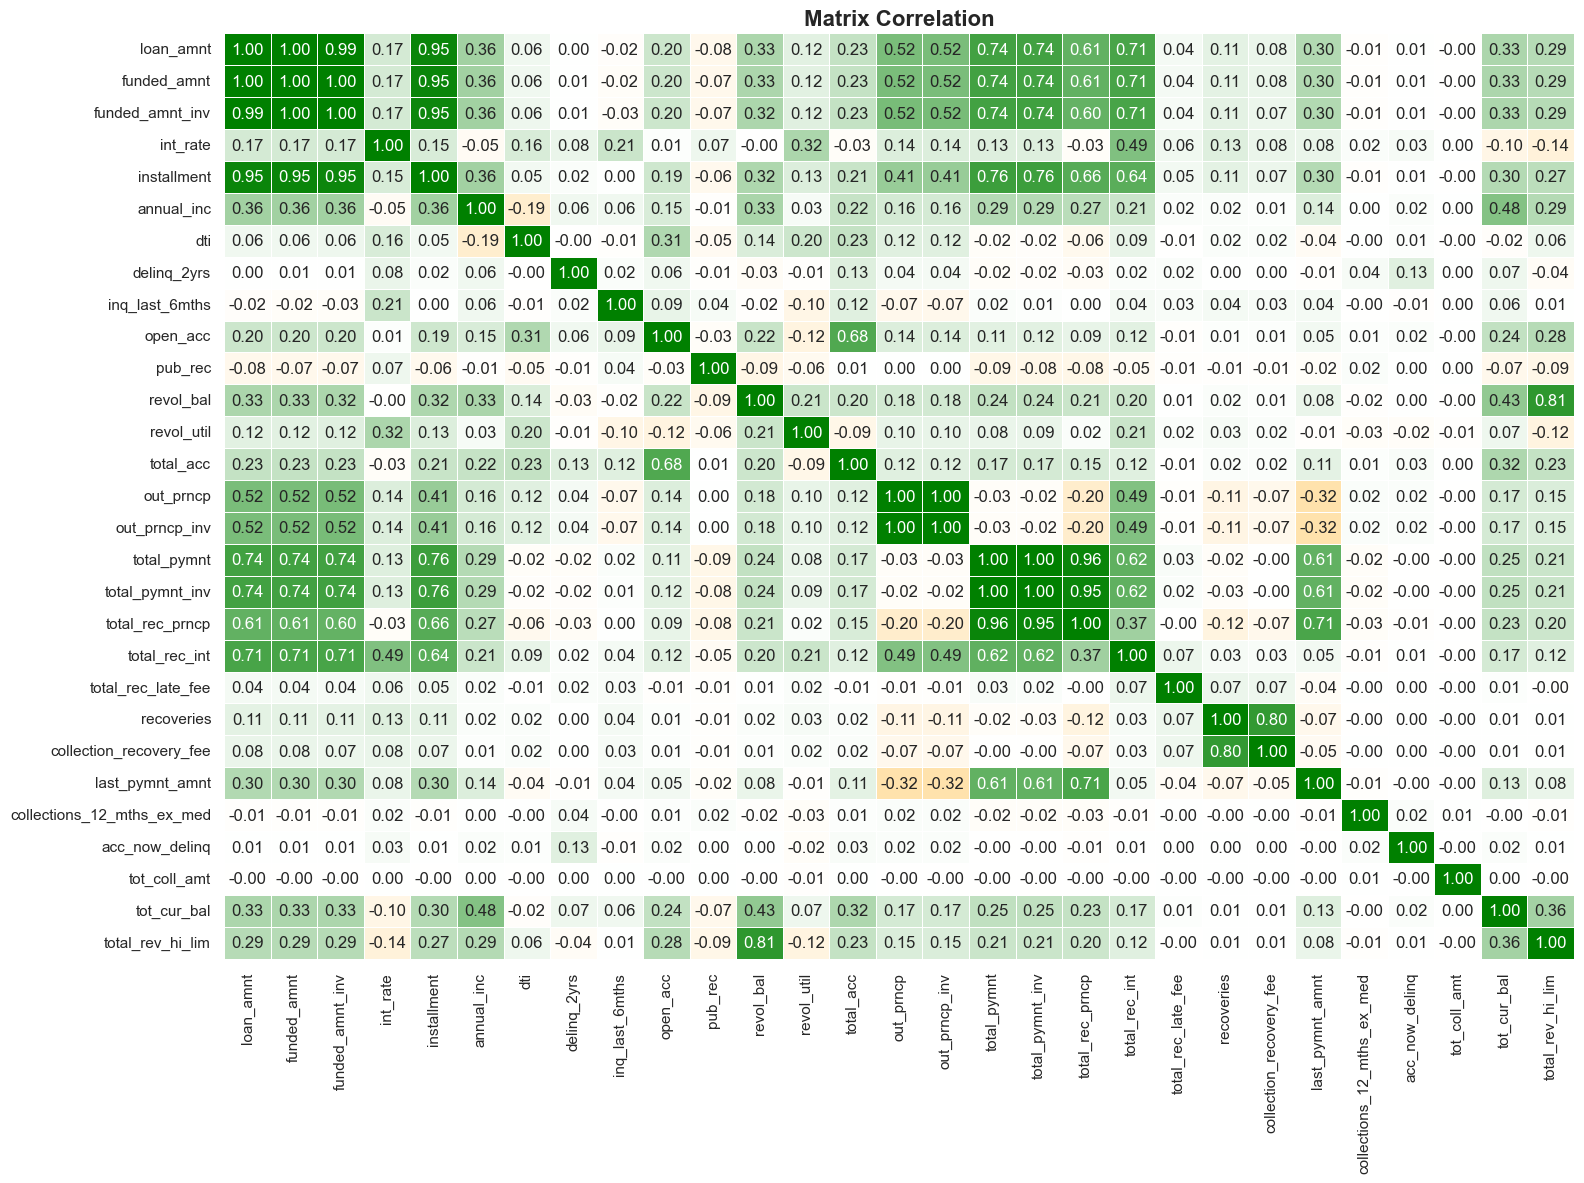

In [49]:
plt.figure(figsize=(16, 12))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ['orange', 'white', 'green'])

sns.heatmap(df[numerical].corr(), annot=True, fmt=".2f", cbar=False, center=0, cmap=cmap, linewidths=0.5)
plt.title('Matrix Correlation', fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

In [50]:
# calculate the correlation matrix
correlation_matrix = df[numerical].corr()

# create a DataFrame to store pairs with a correlation equal to or greater than 0.7
high_correlation_pairs = []

# Iterate over the correlation matrix to find pairs with correlation >= 0.7
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            high_correlation_pairs.append({
                'Variable 1': correlation_matrix.index[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

# convert the list of dictionaries to a DataFrame
high_correlation_df = pd.DataFrame(high_correlation_pairs)
high_correlation_df = high_correlation_df.sort_values(by='Correlation', ascending=False)
print(high_correlation_df)

# create a list of unique variables involved in high-correlation pairs, we can using PCA to reduce the dimension of the data
high_correlation_vars = set(high_correlation_df['Variable 1']).union(set(high_correlation_df['Variable 2']))
high_correlation_vars = list(high_correlation_vars)
high_correlation_vars

         Variable 1               Variable 2  Correlation
18        out_prncp            out_prncp_inv     0.999998
0         loan_amnt              funded_amnt     0.998513
6       funded_amnt          funded_amnt_inv     0.996062
19      total_pymnt          total_pymnt_inv     0.995814
1         loan_amnt          funded_amnt_inv     0.994248
20      total_pymnt          total_rec_prncp     0.956311
21  total_pymnt_inv          total_rec_prncp     0.951763
7       funded_amnt              installment     0.951146
2         loan_amnt              installment     0.948978
11  funded_amnt_inv              installment     0.946661
17        revol_bal         total_rev_hi_lim     0.810843
23       recoveries  collection_recovery_fee     0.798606
15      installment              total_pymnt     0.762308
16      installment          total_pymnt_inv     0.761837
13  funded_amnt_inv          total_pymnt_inv     0.743019
3         loan_amnt              total_pymnt     0.741371
4         loan

['total_pymnt_inv',
 'last_pymnt_amnt',
 'recoveries',
 'out_prncp_inv',
 'out_prncp',
 'funded_amnt_inv',
 'total_rev_hi_lim',
 'collection_recovery_fee',
 'funded_amnt',
 'revol_bal',
 'installment',
 'total_pymnt',
 'total_rec_prncp',
 'loan_amnt',
 'total_rec_int']

### Step 5: Feature Engineering

In [51]:
# backup dataframe
df_backup = df.copy()

In [52]:
# restore point
df = df_backup.copy()

#### 5.1 Data Splitting

In [53]:
# split data into training and testing sets
X = df.drop(['target', 'loan_status'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((355868, 35), (88968, 35))

#### 5.2 Data Cleaning

In [54]:
# handling missing values using SimpleImputer
cols_to_impute = ["tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]
imputer = SimpleImputer(strategy='median')
X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])

# display the imputed data
print("\nX_train_imputed:\n", X_train[["tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]])
print("\nX_test_imputed:\n", X_test[["tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]])


X_train_imputed:
         tot_coll_amt  tot_cur_bal  total_rev_hi_lim
84716            0.0      84052.0           68700.0
461577         300.0      78710.0           18800.0
309102           0.0      52856.0           26400.0
343117           0.0      54885.0           17300.0
115629           0.0      26044.0           15300.0
...              ...          ...               ...
270618           0.0      29035.0           31100.0
382758           0.0      10522.0           38300.0
137694           0.0      29280.0           35112.0
153342           0.0     322317.0           26600.0
127269           0.0     301487.0           74700.0

[355868 rows x 3 columns]

X_test_imputed:
         tot_coll_amt  tot_cur_bal  total_rev_hi_lim
269937          61.0     301368.0            6500.0
50643            0.0     166580.0           30900.0
121254           0.0     252707.0           96100.0
232991           0.0     169691.0           63300.0
367924           0.0      56646.0           64700.0


#### 5.3 Feature Transformation

In [55]:
# backup data
X_train_before_transformation, y_train_before_transformation = X_train.copy(), y_train.copy()
X_test_before_transformation, y_test_before_transformation = X_test.copy(), y_test.copy()

In [56]:
# restore point
X_train, y_train = X_train_before_transformation.copy(), y_train_before_transformation.copy()
X_test, y_test = X_test_before_transformation.copy(), y_test_before_transformation.copy()

##### 5.3.1 Categorical Encoding

In [57]:
# one-hot encoding
oh_encoder = OneHotEncoder(handle_unknown='ignore')
oh_encoded_train = oh_encoder.fit_transform(X_train[['purpose']])
oh_encoded_test = oh_encoder.transform(X_test[['purpose']])

# convert the sparse matrix to a DataFrame
oh_encoded_train_df = pd.DataFrame(oh_encoded_train.toarray(), columns=oh_encoder.get_feature_names_out(['purpose']))
oh_encoded_test_df = pd.DataFrame(oh_encoded_test.toarray(), columns=oh_encoder.get_feature_names_out(['purpose']))

# concatenate the original DataFrame with the one-hot encoded DataFrame
X_train_transformed = X_train.drop(columns=['purpose']).reset_index(drop=True)
X_test_transformed = X_test.drop(columns=['purpose']).reset_index(drop=True)

X_train = pd.concat([X_train_transformed, oh_encoded_train_df], axis=1)
X_test = pd.concat([X_test_transformed, oh_encoded_test_df], axis=1)

# display the processed data
print("X_train_final:")
print(X_train.head())
print("X_test_final:")
print(X_test.head())

X_train_final:
   loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade emp_length home_ownership  annual_inc verification_status    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  purpose_small_business  purpose_vacation  purpose_wedding
0      15000        15000          15000.0   60 months     17.76       378.95     D  10+ years       MORTGAGE     42000.0            Verified  32.29          0.0             2.0      16.0      0.0      22063        32.1   

In [58]:
# ordinal encoding
ordinal_encoder = OrdinalEncoder(handle_unknown='error')
ordinal_encoded_train = ordinal_encoder.fit_transform(X_train[['term', 'grade', 'emp_length', 'home_ownership', 'verification_status']])
ordinal_encoded_test = ordinal_encoder.transform(X_test[['term', 'grade', 'emp_length', 'home_ownership', 'verification_status']])

# convert the sparse matrix to a DataFrame
ordinal_encoded_df_train = pd.DataFrame(ordinal_encoded_train, columns=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status'])
ordinal_encoded_df_test = pd.DataFrame(ordinal_encoded_test, columns=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status'])

# concatenate the original DataFrame with the one-hot encoded DataFrame
X_train_transformed = X_train.drop(columns=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status']).reset_index(drop=True)
X_test_transformed = X_test.drop(columns=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status']).reset_index(drop=True)

X_train = pd.concat([X_train_transformed, ordinal_encoded_df_train], axis=1)
X_test = pd.concat([X_test_transformed, ordinal_encoded_df_test], axis=1)

# display the processed data
print("X_train_final:")
print(X_train.head())
print("X_test_final:")
print(X_test.head())

X_train_final:
   loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  purpose_small_business  purpose_vacation  purpose_wedding  term  grade  emp_length  home_ownership  verification_status
0      15000        15000          15000.0     17.76       378.95     42000.0  32.29          0.0             2.0      16.0      0.0      22063        32.1       44.0    9837.56        9837.56     10230.09         10230.09  

##### 5.3.2 Scaling

In [59]:
# feature transformation
scaler = PowerTransformer(method='yeo-johnson')
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

# display the processed data
print("Processed X_train:\n", X_train)
print("\nProcessed X_test:\n", X_test)

Processed X_train:
         loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc       dti  delinq_2yrs  inq_last_6mths  open_acc   pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  purpose_small_business  purpose_vacation  purpose_wedding  term  grade  emp_length  home_ownership  verification_status
0        0.246629     0.250052         0.248791  0.918039    -0.056249   -0.837969  1.805051    -0.467948        1.265714  1.012512 -0.380633   0.691284   -1.021814   1.485855   1.082616       1.082710     0.07

#### 5.4 Feature Selection

##### 5.4.1 Anova

In [60]:
# for anova test
cols_anova = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
              'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
              'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
              'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
              'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# for chi-square test
cols_chi_onehot = ['purpose_car','purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 
                   'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 
                   'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 
                   'purpose_small_business', 'purpose_vacation', 'purpose_wedding']

cols_chi_ordinal = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status']


print(f'anova test: {len(cols_anova)}\nchi-square test (onehot): {len(cols_chi_onehot)}\nchi-square test (ordinal): {len(cols_chi_ordinal)}')

anova test: 29
chi-square test (onehot): 14
chi-square test (ordinal): 5


In [61]:
# using the ANOVA test for numerical features
selector_anova = SelectPercentile(f_classif, percentile=75)
X_train_anova_selected = selector_anova.fit_transform(X_train[cols_anova], y_train)

# get the indices of the selected features
selected_features_anova = selector_anova.get_support()

# apply the selected features to X_test
X_test_anova_selected = selector_anova.transform(X_test[cols_anova])

# get the scores and p-values
scores_anova = selector_anova.scores_
pvalues_anova = selector_anova.pvalues_

# create a DataFrame with the scores and p-values
features_df_anova = pd.DataFrame({
    'Feature': X_train[cols_anova].columns,
    'Score': scores_anova,
    'p-Value': pvalues_anova
})

# sort the DataFrame by score in descending order
sorted_features_df_anova = features_df_anova.sort_values(by='Score', ascending=False)

# display the sorted DataFrame
print(sorted_features_df_anova)

# display the selected features
selected_features_df_anova = sorted_features_df_anova[sorted_features_df_anova['Feature'].isin(X_train[cols_anova].columns[selector_anova.get_support()])]
print("Selected Features:")
print(selected_features_df_anova)

# display the selected features
selected_features_names_anova = X_train[cols_anova].columns[selected_features_anova]

# concatenate the original DataFrame with the selected features
X_train_transformed_anova = X_train[selected_features_names_anova].reset_index(drop=True)
X_test_transformed_anova = X_test[selected_features_names_anova].reset_index(drop=True)

# display total number of features
print("Total Number of Features:", len(X_train_transformed_anova.columns))

                       Feature          Score        p-Value
21                  recoveries  284618.288936   0.000000e+00
22     collection_recovery_fee  259685.280753   0.000000e+00
18             total_rec_prncp   50065.733973   0.000000e+00
16                 total_pymnt   22949.627459   0.000000e+00
17             total_pymnt_inv   22617.450099   0.000000e+00
14                   out_prncp   19877.423798   0.000000e+00
15               out_prncp_inv   19877.153977   0.000000e+00
23             last_pymnt_amnt   16480.031794   0.000000e+00
20          total_rec_late_fee   11536.360460   0.000000e+00
3                     int_rate   11193.413064   0.000000e+00
5                   annual_inc    1752.171219   0.000000e+00
8               inq_last_6mths    1678.142428   0.000000e+00
12                  revol_util     935.705622  3.142260e-205
6                          dti     827.473915  9.288522e-182
28            total_rev_hi_lim     782.811949  4.531775e-172
27                 tot_c

##### 5.4.2 Chi-Square

In [62]:
# using the chi-square test for categorical features
selector_chi2_onehot = SelectPercentile(chi2, percentile=75)
X_train_chi2_selected_onehot = selector_chi2_onehot.fit_transform(X_train[cols_chi_onehot], y_train)

# get the indices of the selected features
selected_features_chi2_onehot = selector_chi2_onehot.get_support()

# apply the selected features to X_test
X_test_chi2_selected_onehot = selector_chi2_onehot.transform(X_test[cols_chi_onehot])

# get the scores and p-values
scores_chi2_onehot = selector_chi2_onehot.scores_
pvalues_chi2_onehot = selector_chi2_onehot.pvalues_

# create a DataFrame with the scores and p-values
features_df_chi2_onehot = pd.DataFrame({
    'Feature': X_train[cols_chi_onehot].columns,
    'Score': scores_chi2_onehot,
    'p-Value': pvalues_chi2_onehot
})

# sort the DataFrame by score in descending order
sorted_features_df_chi2_onehot = features_df_chi2_onehot.sort_values(by='Score', ascending=False)

# display the sorted DataFrame
print(sorted_features_df_chi2_onehot)

# display the selected features
selected_features_df_chi2_onehot = sorted_features_df_chi2_onehot[sorted_features_df_chi2_onehot['Feature'].isin(X_train[cols_chi_onehot].columns[selector_chi2_onehot.get_support()])]
print("\nSelected Features:")
print(selected_features_df_chi2_onehot)

# display the selected features
selected_features_names_chi2_onehot = X_train[cols_chi_onehot].columns[selected_features_chi2_onehot]

# concatenate the original DataFrame with the selected features
X_train_transformed_chi2_onehot = X_train[selected_features_names_chi2_onehot].reset_index(drop=True)
X_test_transformed_chi2_onehot = X_test[selected_features_names_chi2_onehot].reset_index(drop=True)

# display total number of features
print("Total Number of Features:", len(X_train_transformed_chi2_onehot.columns))

                       Feature       Score        p-Value
11      purpose_small_business  721.411800  6.601865e-159
1          purpose_credit_card  463.395619  8.769035e-103
9                purpose_other  158.374097   2.563891e-36
3          purpose_educational   45.569126   1.473458e-11
2   purpose_debt_consolidation   39.644673   3.046345e-10
8               purpose_moving   28.728055   8.328838e-08
0                  purpose_car   27.138127   1.894250e-07
4     purpose_home_improvement   23.471499   1.267780e-06
5                purpose_house   15.913538   6.630276e-05
6       purpose_major_purchase   14.253304   1.597800e-04
7              purpose_medical   10.293993   1.334640e-03
10    purpose_renewable_energy    6.142496   1.319709e-02
12            purpose_vacation    0.923707   3.365034e-01
13             purpose_wedding    0.268009   6.046702e-01

Selected Features:
                       Feature       Score        p-Value
11      purpose_small_business  721.411800  6.601865

In [63]:
# using the chi-square test for categorical features
selector_chi2_ordinal = SelectPercentile(chi2, percentile=100)
X_train_chi2_selected_ordinal = selector_chi2_ordinal.fit_transform(X_train[cols_chi_ordinal], y_train)

# get the indices of the selected features
selected_features_chi2_ordinal = selector_chi2_ordinal.get_support()

# apply the selected features to X_test
X_test_chi2_selected_ordinal = selector_chi2_ordinal.transform(X_test[cols_chi_ordinal])

# get the scores and p-values
scores_chi2_ordinal = selector_chi2_ordinal.scores_
pvalues_chi2_ordinal = selector_chi2_ordinal.pvalues_

# create a DataFrame with the scores and p-values
features_df_chi2_ordinal = pd.DataFrame({
    'Feature': X_train[cols_chi_ordinal].columns,
    'Score': scores_chi2_ordinal,
    'p-Value': pvalues_chi2_ordinal
})

# sort the DataFrame by score in descending order
sorted_features_df_chi2_ordinal = features_df_chi2_ordinal.sort_values(by='Score', ascending=False)

# display the sorted DataFrame
print(sorted_features_df_chi2_ordinal)

# display the selected features
selected_features_df_chi2_ordinal = sorted_features_df_chi2_ordinal[sorted_features_df_chi2_ordinal['Feature'].isin(X_train[cols_chi_ordinal].columns[selector_chi2_ordinal.get_support()])]
print("\nSelected Features:")
print(selected_features_df_chi2_ordinal)

# display the selected features
selected_features_names_chi2_ordinal = X_train[cols_chi_ordinal].columns[selected_features_chi2_ordinal]

# concatenate the original DataFrame with the selected features
X_train_transformed_chi2_ordinal = X_train[selected_features_names_chi2_ordinal].reset_index(drop=True)
X_test_transformed_chi2_ordinal = X_test[selected_features_names_chi2_ordinal].reset_index(drop=True)

# display total number of features
print("Total Number of Features:", len(X_train_transformed_chi2_ordinal.columns))

               Feature        Score        p-Value
1                grade  9877.427835   0.000000e+00
0                 term  1146.180723  3.033568e-251
3       home_ownership  1042.294663  1.151115e-228
4  verification_status   482.265911  6.865763e-107
2           emp_length   265.678425   9.926709e-60

Selected Features:
               Feature        Score        p-Value
1                grade  9877.427835   0.000000e+00
0                 term  1146.180723  3.033568e-251
3       home_ownership  1042.294663  1.151115e-228
4  verification_status   482.265911  6.865763e-107
2           emp_length   265.678425   9.926709e-60
Total Number of Features: 5


In [64]:
# concat the selected features
cols_selected = np.concatenate((selected_features_names_anova, selected_features_names_chi2_onehot, selected_features_names_chi2_ordinal))
X_train = X_train[cols_selected]
X_test = X_test[cols_selected]

# display shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# display the processed data
print("X_train_final:")
print(X_train.head())
print("X_test_final:")
print(X_test.head())

X_train shape: (355868, 36)
X_test shape: (88968, 36)
X_train_final:
   loan_amnt  int_rate  installment  annual_inc       dti  inq_last_6mths  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  tot_cur_bal  total_rev_hi_lim  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_moving  purpose_other  purpose_small_business  term  grade  emp_length  home_ownership  verification_status
0   0.246629  0.918039    -0.056249   -0.837969  1.805051        1.265714   0.691284   -1.021814   1.485855   1.082616       1.082710     0.078500         0.076757        -0.372020       1.153572           -0.153534   -0.235216                -0.229182        -0.500198    -0.011733          1.574266          0.0                  0.0                         1.0   

##### 5.4.3 Multicollinearity

In [65]:
# backup
X_train_before_multicollinearity, y_train_before_multicollinearity = X_train.copy(), y_train.copy()
X_test_before_multicollinearity, y_test_before_multicollinearity = X_test.copy(), y_test.copy()

In [66]:
# restore
X_train, y_train = X_train_before_multicollinearity, y_train_before_multicollinearity
X_test, y_test = X_test_before_multicollinearity, y_test_before_multicollinearity

In [67]:
# display shape before multicollinearity
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (355868, 36)
X_test shape: (88968, 36)


In [68]:
# class to remove multicollinearity
class RemoveMulticollinearity(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.8):
        self.threshold = threshold
        self.to_drop_ = None
    
    def fit(self, X, y=None):
        corr_matrix = pd.DataFrame(X).corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        self.to_drop_ = [column for column in upper.columns if any(upper[column] > self.threshold)]
        return self
    
    def transform(self, X):
        return pd.DataFrame(X).drop(columns=self.to_drop_).values

In [69]:
# class to remove multicollinearity with vif
class VIFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=10.0):
        self.threshold = threshold
        self.features_to_keep_ = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.features_to_keep_ = list(X.columns)
        while True:
            vif = pd.Series(
                [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
                index=X.columns
            )
            max_vif = vif.max()
            if max_vif > self.threshold:
                feature_to_remove = vif.idxmax()
                self.features_to_keep_.remove(feature_to_remove)
                X = X.drop(columns=[feature_to_remove])
            else:
                break
        return self

    def transform(self, X):
        return pd.DataFrame(X, columns=self.features_to_keep_).values

In [70]:
# instantiate the transformer
remove_multicollinearity = RemoveMulticollinearity(threshold=0.8)

# fit the transformer on the dataset
remove_multicollinearity.fit(X_train)

# transform the dataset
X_transformed = remove_multicollinearity.transform(X_train)

# convert the transformed data back to DataFrame for easy viewing
df_transformed = pd.DataFrame(X_transformed, columns=[col for col in X_train.columns if col not in remove_multicollinearity.to_drop_])

# assign the transformed data to the original dataframe
X_train = df_transformed
X_test = X_test[df_transformed.columns]

print("\nColumns to drop due to multicollinearity:")
print(remove_multicollinearity.to_drop_)

# display the processed data
print("Transformed X_train:")
print(X_train.head())
print("Transformed X_test:")
print(X_test.head())


Columns to drop due to multicollinearity:
['installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee', 'grade']
Transformed X_train:
   loan_amnt  int_rate  annual_inc       dti  inq_last_6mths  revol_bal  revol_util  total_acc  out_prncp  total_pymnt  total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  tot_cur_bal  total_rev_hi_lim  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_moving  purpose_other  purpose_small_business  term  emp_length  home_ownership  verification_status
0   0.246629  0.918039   -0.837969  1.805051        1.265714   0.691284   -1.021814   1.485855   1.082616     0.078500       1.153572           -0.153534   -0.235216        -0.500198    -0.011733          1.574266          0.0                  0.0                         1.0                  0.0                       0.0            0.0                    

In [71]:
# display feature after multicollinearity
print(X_train.columns)
print(X_test.columns)

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_moving', 'purpose_other', 'purpose_small_business', 'term', 'emp_length', 'home_ownership', 'verification_status'], dtype='object')
Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_moving', 'purpose_other', 'purpose

In [72]:
# display final shape after multicollinearity
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (355868, 30)
X_test shape: (88968, 30)


In [73]:
# instantiate transformer
vif_selector = VIFSelector(threshold=10.0)

# fit transformer
vif_selector.fit(X_train)

# transform X_train and X_test
X_train_transformed = vif_selector.transform(X_train)
X_test_transformed = vif_selector.transform(X_test)

# display selected features
selected_features = vif_selector.features_to_keep_
print("Selected Features based on VIF:")
print(selected_features)

# convert the transformed data back to DataFrame for easy viewing
X_train = pd.DataFrame(X_train_transformed, columns=selected_features)
X_test = pd.DataFrame(X_test_transformed, columns=selected_features)

# display the processed data
print("Transformed X_train:")
print(X_train.head())
print("Transformed X_test:")
print(X_test.head())

Selected Features based on VIF:
['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_moving', 'purpose_other', 'purpose_small_business', 'term', 'emp_length', 'home_ownership', 'verification_status']
Transformed X_train:
   loan_amnt  int_rate  annual_inc       dti  inq_last_6mths  revol_bal  revol_util  total_acc  out_prncp  total_pymnt  total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  tot_cur_bal  total_rev_hi_lim  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_moving  purpose_other  purpose_small_business  ter

In [74]:
# display feature after multicollinearity
print(X_train.columns)
print(X_test.columns)

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_moving', 'purpose_other', 'purpose_small_business', 'term', 'emp_length', 'home_ownership', 'verification_status'], dtype='object')
Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_moving', 'purpose_other', 'purpose

In [75]:
# display final shape after vif selection
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (355868, 30)
X_test shape: (88968, 30)


In [76]:
# concatenate X_train and X_test, y_train and y_test
X = (pd.concat([X_train, X_test], axis=0)).reset_index(drop=True)
y = (pd.concat([y_train, y_test], axis=0)).reset_index(drop=True)

In [77]:
Xy = pd.concat([X,y], axis=1).reset_index(drop=True)
Xy.sample(5)

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_moving,purpose_other,purpose_small_business,term,emp_length,home_ownership,verification_status,target
260059,-0.397393,0.879745,-0.939730,-1.474864,-0.934561,-0.894036,1.736816,-2.429981,1.045669,-1.147449,0.063381,-0.153534,-0.235216,-0.783403,-2.090737,-2.051771,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,2.0,1
340904,-1.288801,-1.446805,-0.789121,-2.035458,0.704714,-1.638760,-1.526414,-1.680822,-0.995046,-0.683438,-1.046136,6.514622,-0.235216,-1.048146,-2.619467,-1.344519,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,1
300575,1.178526,-0.818741,-0.270583,-0.653603,-0.934561,0.812017,0.241375,-1.379419,1.154570,0.473712,0.446982,-0.153534,-0.235216,-0.010337,-1.026072,0.748694,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,1
313232,1.968584,1.301838,1.820476,-0.006293,0.704714,0.208426,0.775365,0.383630,0.801071,2.499272,2.305527,-0.153534,-0.235216,0.299281,-0.144855,-0.219293,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1
260523,-2.153065,0.227880,-0.479540,0.801768,1.550789,0.742623,1.724026,-0.425326,0.646459,-2.338761,-1.644016,-0.153534,-0.235216,-1.736465,1.471547,0.042284,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1


### Step 6: Model and Evaluation

In [78]:
# backup data
X_train_before_model, y_train_before_model = X_train.copy(), y_train.copy()
X_test_before_model, y_test_before_model = X_test.copy(), y_test.copy()

In [97]:
# restore point
X_train, y_train = X_train_before_model.copy(), y_train_before_model.copy()
X_test, y_test = X_test_before_model.copy(), y_test_before_model.copy()

#### 6.1 Modelling

In [98]:
# convert dataframes to numpy (prevent data leakage and fast computation)
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test
y_test = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test

In [80]:
# function to create a summary, evaluate and save model
def models_roc_auc(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(random_state=42),
        DecisionTreeClassifier(random_state=42),
        MLPClassifier(random_state=42),
        XGBClassifier(random_state=42),
        LGBMClassifier(random_state=42, verbose=-1),
    ]

    results_list_test = []
    results_list_train = []
    results_list_diff = []
    results_list_diff_pct = []
    models_evaluation = {}

    # Create directory if it doesn't exist
    model_dir = './models'
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    for model in models:
        model_name = type(model).__name__

        # cross-validation with multiple scoring metrics
        scores = cross_validate(model, X_train, y_train, cv=5,
                                scoring=('accuracy', 'precision_weighted', 'recall_weighted', 'roc_auc_ovr_weighted'))
        models_evaluation[model_name] = scores

        model.fit(X_train, y_train)

        # save model object
        with open(os.path.join(model_dir, f'model_{model_name}.pkl'), 'wb') as f:
            pickle.dump(model, f)

        # test set evaluation
        y_pred_test = model.predict(X_test)
        roc_auc_test = roc_auc_score(y_test, y_pred_test, multi_class='ovr', average='weighted')

        results_test = {
            "Model": model_name,
            "CV roc_auc": scores['test_roc_auc_ovr_weighted'].mean(),
            "roc_auc": roc_auc_test
        }
        results_list_test.append(results_test)

        # train set evaluation
        y_pred_train = model.predict(X_train)
        roc_auc_train = roc_auc_score(y_train, y_pred_train, multi_class='ovr', average='weighted')

        results_train = {
            "Model": model_name,
            "roc_auc": roc_auc_train
        }
        results_list_train.append(results_train)

        # diff evaluation
        results_diff = {
            "Model": model_name,
            "roc_auc_Difference": roc_auc_train - roc_auc_test
        }
        results_list_diff.append(results_diff)

        # diff evaluation pct
        results_diff_pct = {
            "Model": model_name,
            "roc_auc_Difference": ((roc_auc_train - roc_auc_test) / roc_auc_train) * 100
        }
        results_list_diff_pct.append(results_diff_pct)

    # dataframe from test and test evaluation
    results_test_df = pd.DataFrame(results_list_test)
    results_test_df.set_index("Model", inplace=True)

    results_train_df = pd.DataFrame(results_list_train)
    results_train_df.set_index("Model", inplace=True)

    # dataframe evaluations diff
    results_diff_df = pd.DataFrame(results_list_diff)
    results_diff_df.set_index("Model", inplace=True)

    # dataframe evaluation diff pct
    results_diff_pct_df = pd.DataFrame(results_list_diff_pct)
    results_diff_pct_df.set_index("Model", inplace=True)

    # new df
    evaluation_df = pd.DataFrame(index=[type(model).__name__ for model in models])
    evaluation_df['CV roc_auc'] = results_test_df['CV roc_auc']
    evaluation_df['roc_auc_Train'] = results_train_df['roc_auc']
    evaluation_df['roc_auc_Test'] = results_test_df['roc_auc']
    evaluation_df['Diff'] = results_diff_df['roc_auc_Difference']
    evaluation_df['Diff (%)'] = results_diff_pct_df['roc_auc_Difference']

    return evaluation_df, models_evaluation, models

In [81]:
# call function to evaluate models
start = time()
summary_evaluation, models_evaluation, models = models_roc_auc(X_train, y_train, X_test, y_test)
end = time()
print(f"Done in {end - start:.3f}s")

Done in 3727.032s


In [82]:
# summary evaluation
summary_evaluation

,CV roc_auc,roc_auc_Train,roc_auc_Test,Diff,Diff (%)
LogisticRegression,0.963359,0.906570,0.904254,0.002317,0.255554
DecisionTreeClassifier,0.915045,1.000000,0.913087,0.086913,8.691251
MLPClassifier,0.975700,0.925892,0.922759,0.003133,0.338376
XGBClassifier,0.975309,0.927566,0.919872,0.007694,0.829479
LGBMClassifier,0.975632,0.920374,0.915571,0.004804,0.521920


In [83]:
# define the list of model names and file paths
model_names = [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'MLPClassifier',
    'XGBClassifier',
    'LGBMClassifier'
]

# dictionary to hold the loaded models
models = {}

# load each model from its respective pickle file
for model_name in model_names:
    file_path = f'./models/model_{model_name}.pkl'
    with open(file_path, 'rb') as f:
        models[model_name] = pickle.load(f)

# access models using the models dictionary
logreg = models['LogisticRegression']
dtree = models['DecisionTreeClassifier']
mlp = models['MLPClassifier']
xgb = models['XGBClassifier']
lgbm = models['LGBMClassifier']

In [99]:
# create the VotingClassifier
start = time()
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg),
    ('dt', dtree),
    ('mlp', mlp),
    ('xgb', xgb),
    ('lgbm', lgbm)
], voting='soft')

# fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
voting_score = roc_auc_score(y_test, voting_pred, multi_class='ovr', average='weighted')
end = time()
print(f"Done in {end - start:.3f}s")

# save the VotingClassifier to a pickle file
with open('./models/voting_classifier.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

print(f'Voting Classifier ROC AUC Score: {voting_score}')

Done in 169.576s
Voting Classifier ROC AUC Score: 0.9195033715737955


In [100]:
# create the StackingClassifier
start = time()
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', logreg),
        ('dt', dtree),
        ('mlp', mlp),
        ('xgb', xgb),
        ('lgbm', lgbm)
    ], 
    final_estimator=MLPClassifier(), 
    stack_method='auto', n_jobs=-1, cv=5)

stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)
stacking_score = roc_auc_score(y_test, stacking_pred, multi_class='ovr', average='weighted')
end = time()
print(f"Done in {end - start:.3f}s")

# save the StackingClassifier to a pickle file
with open('./models/stacking_classifier.pkl', 'wb') as f:
    pickle.dump(stacking_clf, f)

print(f'Stacking Classifier ROC AUC Score: {stacking_score}')

Done in 575.672s
Stacking Classifier ROC AUC Score: 0.9234248094304427


#### 6.2 Evaluation

In [101]:
# classification report on test set
print(classification_report(y_test, stacking_pred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      9852
           1       0.98      1.00      0.99     79116

    accuracy                           0.98     88968
   macro avg       0.99      0.92      0.95     88968
weighted avg       0.98      0.98      0.98     88968



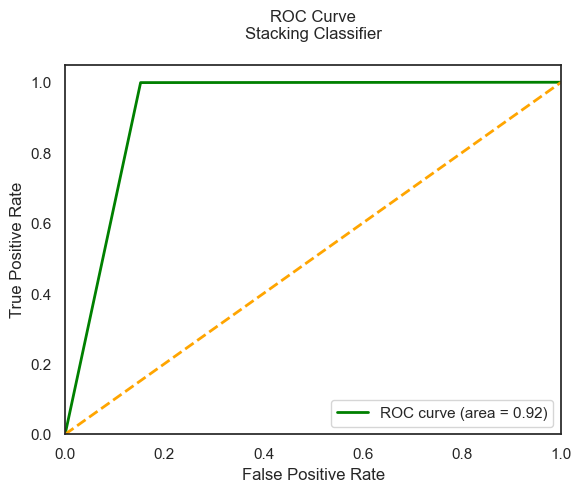

In [102]:
# roc curve
fpr, tpr, thresholds = roc_curve(y_test, stacking_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve\nStacking Classifier\n')
plt.legend(loc="lower right")
plt.show()

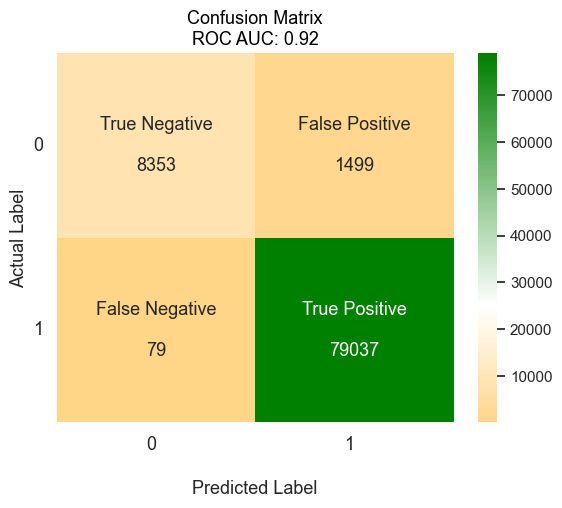

In [103]:
# compute confusion matrix
cm = confusion_matrix(y_test, stacking_pred)
tn, fp, fn, tp = cm.ravel()
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ['orange', 'white', 'green'])

# define names for confusion matrix elements
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# convert counts to string format
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

# create labels with counts and percentages
labels = [f'{v1}\n\n{v2}' for v1, v2 in zip(names, counts)]
labels = np.asarray(labels).reshape(2, 2)

# create heatmap with annotations
heatmap = sns.heatmap(cm, annot=labels, annot_kws={'size': 13}, fmt='', cmap=cmap, center=25000)

# customize tick labels and rotations
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

# set title, ylabel, and xlabel
plt.title(f'Confusion Matrix\nROC AUC: {roc_auc:.2f}', fontsize=13, color='black')
plt.ylabel('Actual Label', fontsize=13)
plt.xlabel('\nPredicted Label', fontsize=13)

# Show the plot
plt.show()

#### 6.3 Pipeline

In [104]:
# split data into training and testing sets
X = df.drop(['target', 'loan_status'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((355868, 35), (88968, 35))

In [105]:
# remove multicollinear features with threshold = 0.8
remove_multicollinearity = RemoveMulticollinearity(threshold=0.8)

# remove multicollinear features with threshold = 10.0
vif_selector = VIFSelector(threshold=10.0)

In [106]:
# preprocessor pipeline
numeric_transformer = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="median")), 
        ("scaler", PowerTransformer(method='yeo-johnson')),
        ("anova", SelectPercentile(f_classif, percentile=75))
    ]
)

categorical_transformer_1 = Pipeline(
    steps=[
        ("cat_imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown='ignore')),
        ("chi-2", SelectPercentile(chi2, percentile=75))
    ]
)

categorical_transformer_2 = Pipeline(
    steps=[
        ("cat_imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinal", OrdinalEncoder()),
        ("chi-2", SelectPercentile(chi2, percentile=100))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical),
        ("cat_1", categorical_transformer_1, ['purpose']),
        ("cat_2", categorical_transformer_2, ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status'])
        ]
    )

# modeling using Stacking Classifier refers to previous step
model = stacking_clf

In [107]:
clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('remove_multicollinearity', remove_multicollinearity),
        ('vif_selector', vif_selector),
        ('model', model)
    ],
    verbose=True
)
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('anova',
                                                                   SelectPercentile(percentile=75))]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'int_rate', 'installment',
                                                   'annual_inc', 'dti',
                                                   'delinq_2yrs',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec'...
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=42, ...)),
                                                ('lgbm',
                                                 LGBMClassifier(random_state=42,
                                                                verbose=-1))],
                                    final_estimator=MLPClassifier(),
                                    n_jobs=-1))],
         verbose=True)

In [108]:
# fit the pipeline on the training data
start = time()
clf.fit(X_train, y_train)
end = time()
print("model score: %.3f" % clf.score(X_test, y_test))
print(f"Done in {end - start:.3f}s")

[Pipeline] ...... (step 1 of 4) Processing preprocessor, total=  17.8s
[Pipeline]  (step 2 of 4) Processing remove_multicollinearity, total=   3.3s
[Pipeline] ...... (step 3 of 4) Processing vif_selector, total=  39.0s
[Pipeline] ............. (step 4 of 4) Processing model, total= 9.5min
model score: 0.982
Done in 629.844s


In [109]:
# extracting the final features
def get_final_features(pipeline, X):
    # get the names of features after preprocessing
    preprocessed_features = pipeline.named_steps['preprocessor'].get_feature_names_out()
    # get the VIF selector's kept features
    vif_selector = pipeline.named_steps['vif_selector']
    kept_features = preprocessed_features[vif_selector.features_to_keep_]
    return kept_features

In [110]:
# get final features after fitting the pipeline
final_features = get_final_features(clf, X_train)
print("Final Features:\n", final_features)
print("Number of Final Features:", len(final_features))

Final Features:
 ['num__loan_amnt' 'num__int_rate' 'num__installment' 'num__annual_inc'
 'num__dti' 'num__inq_last_6mths' 'num__revol_bal' 'num__revol_util'
 'num__total_acc' 'num__out_prncp' 'num__out_prncp_inv' 'num__total_pymnt'
 'num__total_pymnt_inv' 'num__total_rec_prncp' 'num__total_rec_int'
 'num__total_rec_late_fee' 'num__recoveries'
 'num__collection_recovery_fee' 'num__last_pymnt_amnt' 'num__tot_cur_bal'
 'num__total_rev_hi_lim' 'cat_1__purpose_car' 'cat_1__purpose_credit_card'
 'cat_1__purpose_debt_consolidation' 'cat_1__purpose_educational'
 'cat_1__purpose_home_improvement' 'cat_1__purpose_house'
 'cat_1__purpose_major_purchase' 'cat_1__purpose_moving'
 'cat_1__purpose_other']
Number of Final Features: 30


In [113]:
# check model score
print(f'Model score (training): {clf.score(X_train, y_train):.3f}') 
print(f'Model score (testing): {clf.score(X_test, y_test):.3f}')

# check auc score
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)
print(f'AUC score (training): {auc_train:.3f}')
print(f'AUC score (testing): {auc_test:.3f}')

Model score (training): 0.984
Model score (testing): 0.982
AUC score (training): 0.933
AUC score (testing): 0.928


In [138]:
# compute confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
tn, fp, fn, tp = cm.ravel()

# print total number of records
good = y_test[y_test == 1].count()
bad = y_test[y_test == 0].count()
tpr = round(tp / (tp+fn) * 100, 3) 
fpr = round(fp / (fp+tn) * 100, 3)

print("Total number of loan records\t:", len(y_test))
print(f"Total number of Good loans\t: {tp+fn}")
print(f"Total number of Bad loans\t: {tn+fp}")
print(f"True Positive Rate (TPR)\t: {tpr}%")
print(f"False Positive Rate (FPR)\t: {fpr}%")

Total number of loan records	: 88968
Total number of Good loans	: 79116
Total number of Bad loans	: 9852
True Positive Rate (TPR)	: 99.751%
False Positive Rate (FPR)	: 14.22%


In [111]:
# save pipeline to disk
with open('./models/clf_pipeline.pkl','wb') as f:
    pickle.dump(clf, f)

# close the file
f.close()

### Step 7: Simulation and Recommendation

#### 7.1 Business Simulation

1. Asumsi Perhitungan:
- Jumlah Pinjaman Baru: 1000 pinjaman
- Tingkat Default Historis: 20% -- asumsi untuk non model
- Nilai Pinjaman per Pinjaman: Rp 100 Juta -- asumsi
- Profitabilitas per Pinjaman per Tahun: Rp 10 Juta (10%) -- asumsi
- Jangka Waktu Pinjaman: 36 bulan (3 tahun)
- Tidak default -- Lancar / Good -- mengacu pada TPR
- Default -- Tidak Lancar / Bad -- mengacu pada FPR

2. Formula <br>
  - Jumlah Pinjaman yang Tidak Default = TPR * Jumlah Pinjaman Baru
  - Jumlah Pinjaman yang Default = FPR * Jumlah Pinjaman Baru
  - Keuntungan dari Pinjaman yang Tidak Default = Jumlah Pinjaman yang Tidak Default * Profit/tahun * Jangka Waktu Pinjaman
  - Kerugian dari Pinjaman yang Default = Nilai pinjaman * Jumlah Pinjaman yang Default
  - Net Profit = Total Keuntungan dari Pinjaman yang Tidak Default - Kerugian dari Pinjaman yang Default
  - Net Profit Margin = (Net Profit / (Jumlah Pinjaman Baru * Nilai Pinjaman/pinjaman)) * 100%

3. Tabel Simulasi Perbandingan Model dan Non-Model:

    <table border="1">
      <tr>
        <th>Parameter</th>
        <th>Model</th>
        <th>Tanpa Model</th>
      </tr>
      <tr>
        <td>Jumlah Pinjaman Baru</td>
        <td>1000</td>
        <td>1000</td>
      </tr>
      <tr>
        <td>True Positive Rate (TPR)</td>
        <td>99.75%</td>
        <td>N/A</td>
      </tr>
      <tr>
        <td>False Positive Rate (FPR)</td>
        <td>14.22%</td>
        <td>20% (Tingkat Default Historis)</td>
      </tr>
      <tr>
        <td>Nilai Pinjaman per Pinjaman</td>
        <td>Rp 100 Juta</td>
        <td>Rp 100 Juta</td>
      </tr>
      <tr>
        <td>Profitabilitas per Pinjaman per Tahun</td>
        <td>Rp 10 Juta (10%)</td>
        <td>Rp 10 Juta (10%)</td>
      </tr>
      <tr>
        <td>Jangka Waktu Pinjaman</td>
        <td>36 bulan (3 tahun)</td>
        <td>36 bulan (3 tahun)</td>
      </tr>
      <tr>
        <td>Jumlah Pinjaman yang Tidak Default</td>
        <td>998</td>
        <td>800</td>
      </tr>
      <tr>
        <td>Jumlah Pinjaman yang Default</td>
        <td>142</td>
        <td>200</td>
      </tr>
      <tr>
        <td>Keuntungan per Pinjaman Tidak Default</td>
        <td>Rp 30 Juta</td>
        <td>Rp 30 Juta</td>
      </tr>
      <tr>
        <td>Total Keuntungan dari Pinjaman Tidak Default</td>
        <td>Rp 29.94 Miliar</td>
        <td>Rp 24 Miliar</td>
      </tr>
      <tr>
        <td>Kerugian per Pinjaman Default</td>
        <td>Rp 100 Juta</td>
        <td>Rp 100 Juta</td>
      </tr>
      <tr>
        <td>Total Kerugian dari Pinjaman Default</td>
        <td>Rp 14.2 Miliar</td>
        <td>Rp 20 Miliar</td>
      </tr>
      <tr>
        <td>Net Profit</td>
        <td>Rp 15.74 Miliar</td>
        <td>Rp 4 Miliar</td>
      </tr>
      <tr>
        <td>Net Profit Margin</td>
        <td>15.74%</td>
        <td>4%</td>
      </tr>
    </table>

Penggunaan model machine learning secara signifikan meningkatkan Net Profit Margin dari 4% menjadi 15.74%. Model ini membantu mengurangi jumlah pinjaman yang default dan meningkatkan jumlah pinjaman yang tidak default, sehingga secara keseluruhan meningkatkan keuntungan bersih perusahaan.

#### 7.2 Business Recommendation

Berikut adalah rekomendasi berdasarkan analisis di atas:

1. Implementasi Model Machine Learning:

   - Menggunakan model machine learning untuk memprediksi default pinjaman terbukti lebih efektif dalam meningkatkan keuntungan dan mengurangi risiko. Disarankan untuk mengadopsi model yang telah diuji ini dalam proses penilaian pinjaman.

2. Pengawasan dan Pemeliharaan Model:

   - Pastikan model machine learning diawasi dan diperbarui secara berkala untuk memastikan akurasi prediksi tetap tinggi seiring dengan perubahan kondisi pasar dan data peminjam.

3. Pelatihan Tim:

   - Memberikan pelatihan kepada tim terkait untuk memahami cara kerja model dan bagaimana menggunakannya dalam penilaian pinjaman sehari-hari.

4. Pengembangan Infrastruktur Teknologi:

   - Investasi dalam infrastruktur teknologi yang mendukung penerapan model machine learning secara efisien, termasuk sistem manajemen data yang kuat dan sumber daya komputasi yang memadai.

5. Evaluasi Kinerja Berkala:

   - Melakukan evaluasi kinerja model secara berkala untuk memastikan bahwa model tetap relevan dan memberikan manfaat sesuai yang diharapkan. Sesuaikan parameter dan algoritma model jika diperlukan.

Dengan mengadopsi dan mengimplementasikan model machine learning yang efektif, perusahaan dapat meningkatkan efisiensi operasional, mengurangi risiko default, dan pada akhirnya meningkatkan profitabilitas secara signifikan.